In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50

df = pd.read_csv('Data_Marketing_Customer_Analysis_Round3 (1).csv')
df.head()

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize


In [28]:
numerical.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

In [29]:
numerical = df.select_dtypes(np.number)

In [101]:
categorical = df.select_dtypes('object')

In [131]:
categorical.dropna(inplace=True)

In [30]:
numerical.dropna(inplace=True)

In [33]:
from sklearn.model_selection import train_test_split


X = numerical.drop(columns=['total_claim_amount'])
y = numerical['total_claim_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_test


3487      120
668       660
10315     244
5332       86
1523     1032
         ... 
7089      285
2507      494
7965      537
8523      446
9803      404
Name: total_claim_amount, Length: 2138, dtype: int64

In [34]:
X_train.shape

(8551, 7)

In [35]:
numerical.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

In [36]:
from sklearn.preprocessing import StandardScaler

#object = class
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)


In [37]:
from sklearn.linear_model import LinearRegression


lm = LinearRegression()
model = lm.fit(X_train_scaled,y_train)


In [38]:
model.coef_

array([-7.44374050e+00, -3.35677864e+01,  1.88742534e+02,  1.27912773e-01,
       -3.00331832e+00,  2.86638652e-01,  2.40707525e+00])

In [39]:
model.intercept_

432.7827154718746

In [40]:
X_test_scaled = scaler.transform(X_test)

In [41]:
y_pred = model.predict(X_test_scaled)

In [42]:
residuals = np.array(y_test - y_pred)

In [43]:
res_df = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred, 'residuals':residuals})

In [44]:
res_df

,y_test,y_pred,residuals
3487,120,230.080624,-110.080624
668,660,559.062818,100.937182
10315,244,340.972244,-96.972244
5332,86,268.949617,-182.949617
1523,1032,1104.937431,-72.937431
...,...,...,...
7089,285,493.750706,-208.750706
2507,494,462.964323,31.035677
7965,537,490.612535,46.387465
8523,446,463.725456,-17.725456


In [45]:
from sklearn.metrics import mean_squared_error as mse

mse(y_test,y_pred)

48603.25525355552

In [46]:
rmse = np.sqrt(mse(y_test,y_pred))

In [47]:
rmse

220.4614597918546

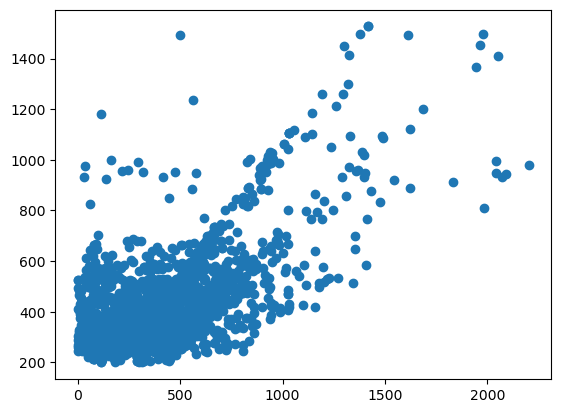

In [48]:
import matplotlib.pyplot as plt

x = y_test
y = y_pred

plt.scatter(x,y)

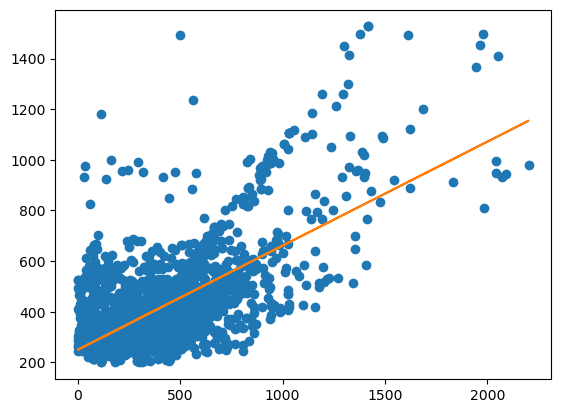

In [49]:
#m slope b intercept
plt.plot(y_test,y_pred,'o')
m,b = np.polyfit(y_test,y_pred,1)
plt.plot(y_test,m*y_test+b)

In [61]:
R2=r2_score(y_test,y_pred)
R2

R2_test=model.score(X_test_scaled,y_test)
R2_train=model.score(X_train_scaled,y_train)
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

0.3993054444182199

In [70]:
X_train_scaled = pd.DataFrame(X_train_scaled)

In [71]:
X_train_scaled

,0,1,2,3,4,5,6
0,1.960751,-1.191074,-0.818409,-0.605527,-0.617389,-0.417266,-0.410084
1,0.057838,-0.469596,0.367470,-1.000293,1.788540,1.805812,1.257753
2,-0.587856,-0.091986,0.222850,-1.197677,-0.689207,-0.417266,-0.827043
3,1.010316,-0.236872,-0.876257,-1.197677,0.890806,1.805812,-0.410084
4,1.469691,0.245368,0.627784,-1.395060,0.459893,-0.417266,-0.410084
...,...,...,...,...,...,...,...
8546,-0.056203,1.896893,0.020383,0.677465,0.639440,-0.417266,0.006875
8547,3.970404,1.388436,0.136079,0.184007,1.070352,-0.417266,-0.410084
8548,-0.548139,-1.294044,-0.847333,1.072232,-1.443304,4.028889,2.091671
8549,0.722222,1.021304,0.367470,0.776157,1.501265,-0.417266,-0.410084


In [77]:
X_test_scaled = pd.DataFrame(X_test_scaled)

In [78]:
X_test_scaled

,0,1,2,3,4,5,6
0,-0.456148,0.842796,-0.934105,-1.493752,1.070352,-0.417266,0.840794
1,0.180785,-0.372938,0.627784,-0.506835,1.070352,-0.417266,0.006875
2,-0.699707,0.669709,-0.384551,-1.493752,-0.114657,-0.417266,-0.827043
3,-0.427528,0.374232,-0.847333,0.480082,-1.730579,0.694273,0.006875
4,0.063094,-0.215024,3.520172,-1.098985,-0.976482,0.694273,-0.827043
...,...,...,...,...,...,...,...
2133,-0.638671,-1.552056,0.020383,1.565690,-0.725117,-0.417266,-0.827043
2134,0.042068,0.777494,0.280698,1.072232,-1.191939,-0.417266,0.006875
2135,-0.578219,1.301407,0.541013,-0.901602,0.890806,-0.417266,-0.827043
2136,-0.110230,-0.768715,-0.008541,0.184007,-0.330114,-0.417266,2.091671


In [97]:
feature_importances = pd.DataFrame(data={
    'Variable': X_test.columns,
    'Importance': abs(model.coef_.reshape(len(X_test_scaled.columns),))
})  #corresponding coef
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
feature_importances

,Variable,Importance
2,monthly_premium_auto,188.742534
1,income,33.567786
0,customer_lifetime_value,7.443740
4,months_since_policy_inception,3.003318
6,number_of_policies,2.407075
5,number_of_open_complaints,0.286639
3,months_since_last_claim,0.127913


In [96]:
feature_importances = pd.DataFrame(data={
    'Variable': X_train.columns,
    'Importance': abs(model.coef_.reshape(len(X_train_scaled.columns),))
})  #corresponding coef
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
feature_importances

,Variable,Importance
2,monthly_premium_auto,188.742534
1,income,33.567786
0,customer_lifetime_value,7.443740
4,months_since_policy_inception,3.003318
6,number_of_policies,2.407075
5,number_of_open_complaints,0.286639
3,months_since_last_claim,0.127913


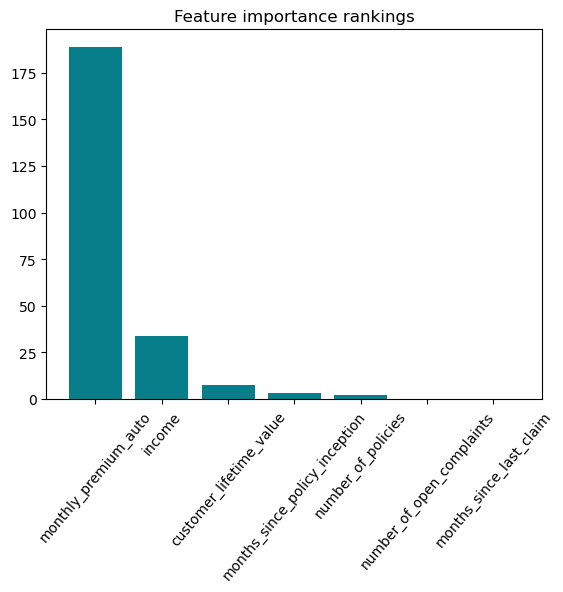

In [100]:
plt.bar(x=feature_importances['Variable'].iloc[:10], height=feature_importances['Importance'].iloc[:10], color='#087E8B')
plt.title('Feature importance rankings', size=12)
plt.xticks(rotation=50) # labels = columns list
plt.show()

In [87]:
pt = PowerTransformer()
total_claim_amount_transformed=pt.fit_transform(numerical['total_claim_amount'].to_numpy().reshape(-1,1))


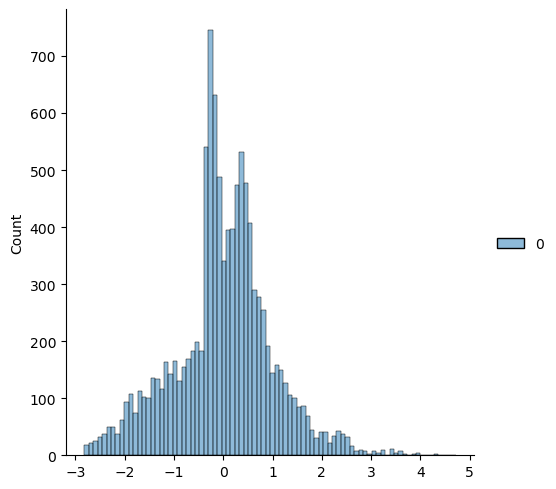

In [88]:
sns.displot(total_claim_amount_transformed)

In [92]:
y_pred

array([230.08062389, 559.06281849, 340.97224399, ..., 490.61253546,
       463.72545559, 590.35490144])

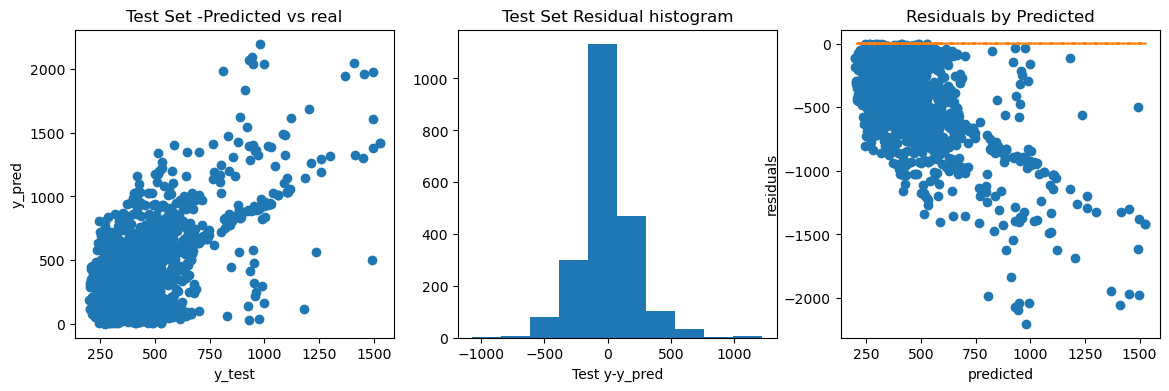

In [95]:
fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,-y_test,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

In [105]:
categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   region             10689 non-null  object
 1   response           10689 non-null  object
 2   coverage           10689 non-null  object
 3   education          10689 non-null  object
 4   effective_to_date  10689 non-null  object
 5   month              10689 non-null  object
 6   employment_status  10689 non-null  object
 7   gender             10689 non-null  object
 8   location_code      10689 non-null  object
 9   marital_status     10689 non-null  object
 10  policy_type        10689 non-null  object
 11  policy             10689 non-null  object
 12  renew_offer_type   10689 non-null  object
 13  sales_channel      10689 non-null  object
 14  vehicle_class      10689 non-null  object
 15  vehicle_size       10689 non-null  object
dtypes: object(16)
memory usage: 1.3+ MB


In [117]:
df_encoded = pd.get_dummies(categorical, drop_first=True, dtype = int)

In [118]:
df_encoded.columns

Index(['region_east', 'region_north west', 'region_west region',
       'response_yes', 'coverage_extended', 'coverage_premium',
       'education_college', 'education_doctor',
       'education_high school or below', 'education_master',
       ...
       'sales_channel_branch', 'sales_channel_call center',
       'sales_channel_web', 'vehicle_class_luxury car',
       'vehicle_class_luxury suv', 'vehicle_class_sports car',
       'vehicle_class_suv', 'vehicle_class_two-door car',
       'vehicle_size_medsize', 'vehicle_size_small'],
      dtype='object', length=101)

In [126]:
df_encoded

,region_east,region_north west,region_west region,response_yes,coverage_extended,coverage_premium,education_college,education_doctor,education_high school or below,education_master,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,0,1,0,1,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
10685,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
10686,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
10687,0,0,1,0,0,1,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0


In [138]:
categorical.employment_status.unique()

array(['employed', 'unemployed', 'medical leave', 'disabled', 'retired'],
      dtype=object)

In [146]:
ord_encoded = categorical[['education','month','employment_status']]
ord_encoded = ord_encoded.replace({
    'education':
        {'high school or below': 1, 'college': 2, 'bachelor': 3, 'master': 4, 'doctor': 5},
    'month': {'jan': 1, 'feb': 2},
    'employment_status': {'employed': 1, 'unemployed': 2, 'medical leave': 3, 'disabled': 4, 'retired': 5}
})
hot_encoded = categorical.drop(['education','month','employment_status','effective_to_date'], axis=1)
hot_encoded = pd.get_dummies(hot_encoded, drop_first=True, dtype=int)
cat_encoded = pd.concat([ord_encoded,hot_encoded], axis=1)
all_data = pd.concat([numerical,cat_encoded], axis=1)
all_data

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,education,month,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,4809,48029,61,7,52,0,9,292,2,2,...,0,0,0,0,0,0,0,0,1,0
1,2228,92260,64,3,26,0,1,744,2,1,...,0,1,0,0,0,0,0,0,1,0
2,14947,22139,100,34,31,0,2,480,3,2,...,0,1,0,0,0,0,1,0,1,0
3,22332,49078,97,10,3,0,2,484,2,1,...,1,0,0,0,0,0,0,0,1,0
4,9025,23675,117,33,31,0,7,707,3,1,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214,3,1,...,0,0,1,1,0,0,0,0,1,0
10685,5259,61146,65,7,68,0,6,273,2,1,...,1,0,0,0,0,0,0,0,1,0
10686,23893,39837,201,11,63,0,2,381,3,2,...,0,0,1,0,1,0,0,0,1,0
10687,11971,64195,158,0,27,4,6,618,2,2,...,1,0,0,0,0,0,1,0,1,0


In [147]:
from sklearn.model_selection import train_test_split


X = all_data.drop(columns=['total_claim_amount'])
y = all_data['total_claim_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_test


3487      120
668       660
10315     244
5332       86
1523     1032
         ... 
7089      285
2507      494
7965      537
8523      446
9803      404
Name: total_claim_amount, Length: 2138, dtype: int64

In [148]:
X_train.shape

(8551, 44)

In [149]:
from sklearn.preprocessing import StandardScaler

#object = class
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [150]:
from sklearn.linear_model import LinearRegression


lm = LinearRegression()
model = lm.fit(X_train_scaled,y_train)

In [151]:
model.coef_

array([-1.18716210e+00,  2.30222915e+00,  1.82649044e+02,  3.49648808e+00,
       -1.00155502e+00, -1.53009220e+00,  2.39188419e+00, -5.98514097e+00,
       -1.88724852e+00,  1.21525952e+01, -1.23974700e-01, -4.56066998e-01,
        1.31752907e+00, -1.36199906e+01, -6.59391973e+00, -4.35870736e+00,
        6.03709783e+00,  1.94027220e+02,  8.32696339e+01,  9.99922707e-02,
        4.27625962e+01,  1.02240673e+13, -4.42596977e+14, -2.99753988e+00,
       -1.22895076e+00, -8.00886105e+12, -9.79539771e+12, -1.12510632e+13,
        1.88517307e+14,  2.93100756e+14,  2.82258775e+14,  4.47895821e+00,
        7.28202395e-01, -1.72104083e-02, -1.24867337e+00, -3.51907839e-01,
       -7.30958313e-01,  6.28898688e-02, -3.91601195e+00, -5.89945158e+00,
       -7.15778084e+00, -1.24173643e+00, -4.16015675e+00, -3.79634482e+00])

In [152]:
model.intercept_

432.778155585434